# 시카고 샌드위치 맛집 분석
## 1. 시카고 샌드위치 맛집 사이트에 접근하기

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [2]:
url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")

In [3]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Al

In [4]:
len(soup.find_all('div', 'sammy'))

50

In [5]:
print(soup.find_all('div', 'sammy')[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>


## 2. 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기

In [6]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [7]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [8]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [9]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [10]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [11]:
import re

In [12]:
tmp_string = tmp_one.find(class_='sammyListing').get_text()

re.split(('\n|\r\n'), tmp_string)

print(re.split(('\n|\r\n'), tmp_string)[0])
print(re.split(('\n|\r\n'), tmp_string)[1])

BLT
Old Oak Tap


In [13]:
from urllib.parse import urljoin

In [14]:
rank = []
main_menu = []
cafe_name = []
url_add = []

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()

    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

In [15]:
from tqdm import tqdm_notebook 
import time 
rank = [] 
main_menu = [] 
cafe_name = [] 
url_add = [] 
list_soup = soup.find_all('div', 'sammy') 
bar_total = tqdm_notebook(list_soup) 
for item in bar_total: 
    rank.append(item.find(class_='sammyRank').get_text()) 
    tmp_string = item.find(class_='sammyListing').get_text() 
    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0]) 
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1]) 
    url_add.append(urljoin(url_base, item.find('a')['href'])) 
    time.sleep(0.05)

In [16]:
rank[:5]

['1', '2', '3', '4', '5']

In [17]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [18]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [19]:
url_add[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [20]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

In [21]:
import pandas as pd

data = {'Rank':rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Fried Bologna,Au Cheval,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Woodland Mushroom,Xoco,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Roast Beef,Al’s Deli,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,PB&L,Publican Quality Meats,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [22]:
# 컬럼 순서 변경
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [23]:
df.to_csv('data/03.best_sandwiches_list_chicago.csv', sep=',', 
          encoding='UTF-8')

## 3. 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기

In [24]:
df['URL'][0]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE doctype html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
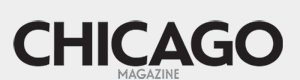

In [25]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, "html.parser")
soup_tmp

In [26]:
print(soup_tmp.find('p', 'addy'))

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>


In [27]:
price_tmp = soup_tmp.find('p', 'addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [28]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [29]:
price_tmp.split()[0]
'$10.'

'$10.'

In [30]:
price_tmp.split()[0][:-1]

'$10'

In [31]:
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

In [32]:
' '.join(price_tmp.split()[1:-2])[:-1]

'2109 W. Chicago Ave.'

In [33]:
price = []
address = []

for n in df.index[:3]:
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2])[:-1])

In [34]:
price

['$10', '$9', '$9.50']

In [35]:
address

['2109 W. Chicago Ave.', '800 W. Randolph St.', '445 N. Clark St.']

- 상태 진행바 적용

In [36]:
price = []
address = []

for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'lxml')
    
    gettings = soup_tmp.find('p', 'addy').get_text()
    
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2])[:-1])

In [37]:
price[:5]

['$10', '$9', '$9.50', '$9.40', '$10']

In [38]:
address[:5]

['2109 W. Chicago Ave.',
 '800 W. Randolph St.',
 '445 N. Clark St.',
 '914 Noyes St., Evanston',
 '825 W. Fulton Mkt.']

In [39]:
df['Price'] = price
df['Address'] = address

df = df.loc[:, ['Rank', 'Cafe', 'Menu', 'Price', 'Address']]
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,Price,Address
Rank,,,,
1,Old Oak Tap,BLT,$10,2109 W. Chicago Ave.
2,Au Cheval,Fried Bologna,$9,800 W. Randolph St.
3,Xoco,Woodland Mushroom,$9.50,445 N. Clark St.
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston"
5,Publican Quality Meats,PB&L,$10,825 W. Fulton Mkt.


In [40]:
df.to_csv('data/03.best_sandwiches_list_chicago2.csv', sep=',', 
          encoding='UTF-8')

## 3-8 맛집 위치를 지도에 표기하기

In [41]:
import numpy as np
import pandas as pd
import folium
import googlemaps

In [42]:
gmaps_key = "***********" # 자신의 Google Map API key를 사용합니다.
gmaps = googlemaps.Client(key=gmaps_key)

In [43]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['Address'][n] != 'Multiple':
        target_name = df['Address'][n]+', '+'Chicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lng'])
    else:
        lat.append(np.nan)
        lng.append(np.nan)

In [44]:
df['lat'] = lat
df['lng'] = lng
df.head()

,Cafe,Menu,Price,Address,lat,lng
Rank,,,,,,
1,Old Oak Tap,BLT,$10,2109 W. Chicago Ave.,41.895605,-87.679961
2,Au Cheval,Fried Bologna,$9,800 W. Randolph St.,41.884658,-87.647667
3,Xoco,Woodland Mushroom,$9.50,445 N. Clark St.,41.890618,-87.630933
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston",42.058322,-87.683748
5,Publican Quality Meats,PB&L,$10,825 W. Fulton Mkt.,41.886600,-87.648451


In [45]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], 
                                      zoom_start=11)
folium.Marker([df['lat'].mean(), df['lng'].mean()], 
                                      popup='center').add_to(mapping)
mapping

In [46]:
mapping = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], 
                     zoom_start=11)

for n in df.index:
    if df['Address'][n] != 'Multiple':
        folium.Marker([df['lat'][n], df['lng'][n]], 
                                      popup=df['Cafe'][n]).add_to(mapping)

mapping

In [47]:
df.to_csv('data/03.best_sandwiches_list_chicago3.csv', sep=',', 
          encoding='UTF-8')